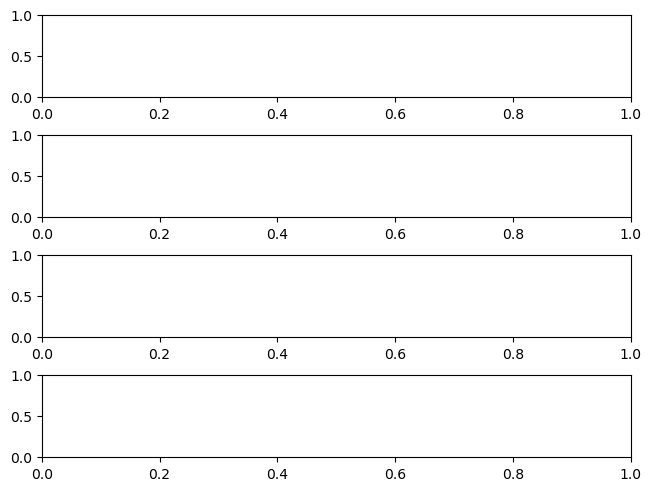

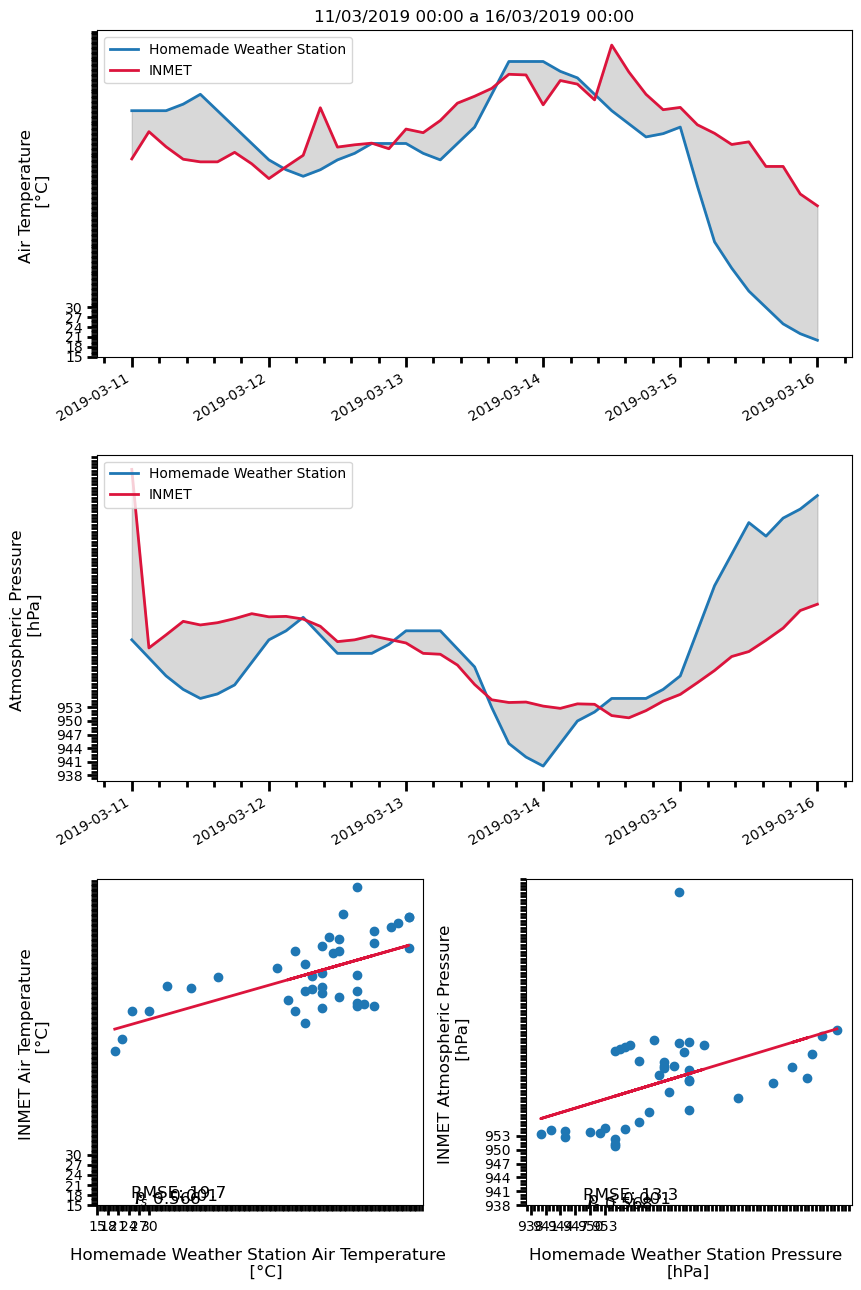

In [1]:
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Reu_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


temp_ws = csv_import['Wind_IB']
temp_ws = temp_ws.values
pres_ws = csv_import['Pressure_IB']
pres_ws = pres_ws.values

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_KF_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_KF','Pressure_KF'])
temp_inmet = csv_import['Wind_KF']
temp_inmet = temp_inmet.values
pres_inmet = csv_import['Pressure_KF']
pres_inmet = pres_inmet.values

#2. Calculate RMSE, correlation and p-value.
# Calculate correlation, trend and RMSE
# Variable 1 (Air Temperature)
stats = scipy.stats.spearmanr(temp_ws,temp_inmet, axis=0, nan_policy='propagate')
cor1  = str(stats[0])
pval1 = stats[1]
cor1  = cor1[0:5]
z1    = np.polyfit(temp_ws,temp_inmet, 1)
p1    = np.poly1d(z1)
rmse1 = np.sqrt(np.mean((temp_ws-temp_inmet)**2))
rmse1 = str(rmse1)
rmse1 = rmse1[0:4]

# Variable 2.
# Atmospheric Pressure.
stats = scipy.stats.spearmanr(pres_ws,pres_inmet, axis=0, nan_policy='propagate')
cor2  = str(stats[0])
pval2 = stats[1]
cor2  = cor2[0:5]
z2    = np.polyfit(pres_ws,pres_inmet, 1)
p2    = np.poly1d(z2)

rmse2 = np.sqrt(np.mean((pres_ws-pres_inmet)**2))
rmse2 = str(rmse2)
rmse2 = rmse2[0:4]

#4. Create variable to store X-Axis data.
# Rearrange time.
#idx   = pd.date_range('2020-04-12 12:00', '2020-04-19 18:45', freq = '1H')
idx   = pd.date_range('2019-03-11 00:00', '2019-03-16 00:00', freq = '3H')
hours = mdates.HourLocator(interval = 6)
h_fmt = mdates.DateFormatter('%d/%M %Hh')

#3. Plot figure and set axis/data resources.
# Create figures subplots.
axs = plt.subplots(4, 1, constrained_layout=True)
fig = plt.figure()

# Y-axis range for each plots.
y_major_ticks  = np.arange(15, 32, 3)
y_major_ticks2 = np.arange(938, 953.1, 3)
y_major_ticks3 = np.arange(0, 1, 2)
y_major_ticks4 = np.arange(-4, 5, 0.5)

# Plot the figures.
# Plot 1.
ax1 = plt.subplot2grid((3,3), (0,0),rowspan=1,colspan=2)
ax1.plot(idx,temp_ws,linestyle='-',label='Homemade Weather Station', marker='',linewidth=2,color='C0')  
ax1.plot(idx,temp_inmet,linestyle='-',label='INMET',marker='',linewidth=2,color='crimson') 
plt.fill_between(idx, temp_ws, temp_inmet,alpha=0.3,color='gray')
ax1.legend(loc='upper left',fontsize=10)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both',  width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.set_yticks(y_major_ticks)
ax1.set_ylabel('Air Temperature \n [°C]',fontsize=12, labelpad=10)
ax1.set_title('11/03/2019 00:00 a 16/03/2019 00:00')
for label in ax1.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

# Plot 2.
ax2 = plt.subplot2grid((3,3), (1,0), rowspan=1,colspan=2) 
ax2.plot(idx,pres_ws,label='Homemade Weather Station',linestyle='-',marker='',linewidth=2,color='C0',alpha=1)    
ax2.plot(idx,pres_inmet,label='INMET',linestyle='-',marker='',linewidth=2,color='crimson')
plt.fill_between(idx, pres_ws, pres_inmet,alpha=0.3,color='gray')
ax2.legend(loc='upper left',fontsize=10)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='both',  width=2)
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax2.set_yticks(y_major_ticks2)
ax2.set_ylabel('Atmospheric Pressure \n [hPa]',fontsize=12, labelpad=10)
for label in ax2.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

# Plot 3.
ax3 = plt.subplot2grid((3,3), (2,0)) 
ax3.scatter(temp_ws,temp_inmet,color='C0')   
ax3.plot(temp_ws,p1(temp_ws),linestyle='-',color='crimson',linewidth=2)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which='both',  width=2)
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)
ax3.set_yticks(y_major_ticks)
ax3.set_xticks(y_major_ticks)
ax3.set_ylabel('INMET Air Temperature \n  [°C]',fontsize=12, labelpad=10)
ax3.set_xlabel('Homemade Weather Station Air Temperature \n  [°C]',fontsize=12, labelpad=10)
ax3.text(25.6,15.2,'$r_{s}$ '+cor1,color='k',fontsize=12)
if pval1 < 0.001:
    ax3.text(25.8,16.2,'p < 0.001',color='k',fontsize=12)
else:
    ax3.text(25.8,16.2,'p > 0.001',color='k',fontsize=12)  
ax3.text(24.8,17.2,'RMSE: '+rmse1,color='k',fontsize=12)

# plot 4.
ax4 = plt.subplot2grid((3,3), (2,1),)     
ax4.scatter(pres_ws,pres_inmet,color='C0')  
ax4.plot(pres_ws,p2(pres_ws),linestyle='-',color='crimson',linewidth=2)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which='both',  width=2)
ax4.tick_params(which='major', length=7)
ax4.tick_params(which='minor', length=4)
ax4.set_yticks(y_major_ticks2)
ax4.set_xticks(y_major_ticks2)
ax4.set_ylabel('INMET Atmospheric Pressure \n [hPa]',fontsize=12, labelpad=10)
ax4.set_xlabel('Homemade Weather Station Pressure \n[hPa]',fontsize=12, labelpad=10)
ax4.text(949.2,937.2,'$r_{s}$ '+cor2,color='k',fontsize=12)
if pval2 < 0.001:
    ax4.text(949.5,938.2,'p < 0.001',color='k',fontsize=12)
else:
    ax4.text(949.5,938.2,'p > 0.001',color='k',fontsize=12)
ax4.text(948.5,939.2,'RMSE: '+rmse2,color='k',fontsize=12)


# Set final fig resources and then save figure.
fig.set_size_inches(13, 13)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.3)
fig.savefig('feb_kf_linear_reg_time_series.png',transparent=False, bbox_inches = 'tight', pad_inches=0, dpi=250)


[46.2996  46.2996  46.2996  47.32848 48.8718  46.2996  43.7274  41.1552
 38.583   37.03968 36.0108  37.03968 38.583   39.61188 41.1552  41.1552
 41.1552  39.61188 38.583   41.1552  43.7274  48.8718  54.0162  54.0162
 54.0162  52.47288 51.444   48.8718  46.2996  44.24184 42.18408 42.69852
 43.7274  34.46748 25.722   21.60648 18.0054  15.4332  12.861   11.31768
 10.2888 ]
[38.737332 43.007184 40.64076  38.685888 38.274336 38.274336 39.766212
 37.965672 35.650692 37.502676 39.303216 46.762596 40.589316 40.949424
 41.206644 40.332096 43.418736 42.852852 44.75628  47.482812 48.563136
 49.797792 52.009884 51.906996 47.225592 51.032448 50.466564 47.997252
 56.5884   52.369992 48.8718   46.453932 46.81404  44.087508 42.749964
 41.000868 41.41242  37.55412  37.55412  33.232824 31.38084 ]
mae1= 7.33516156097561
mae2= 9.90975609756098


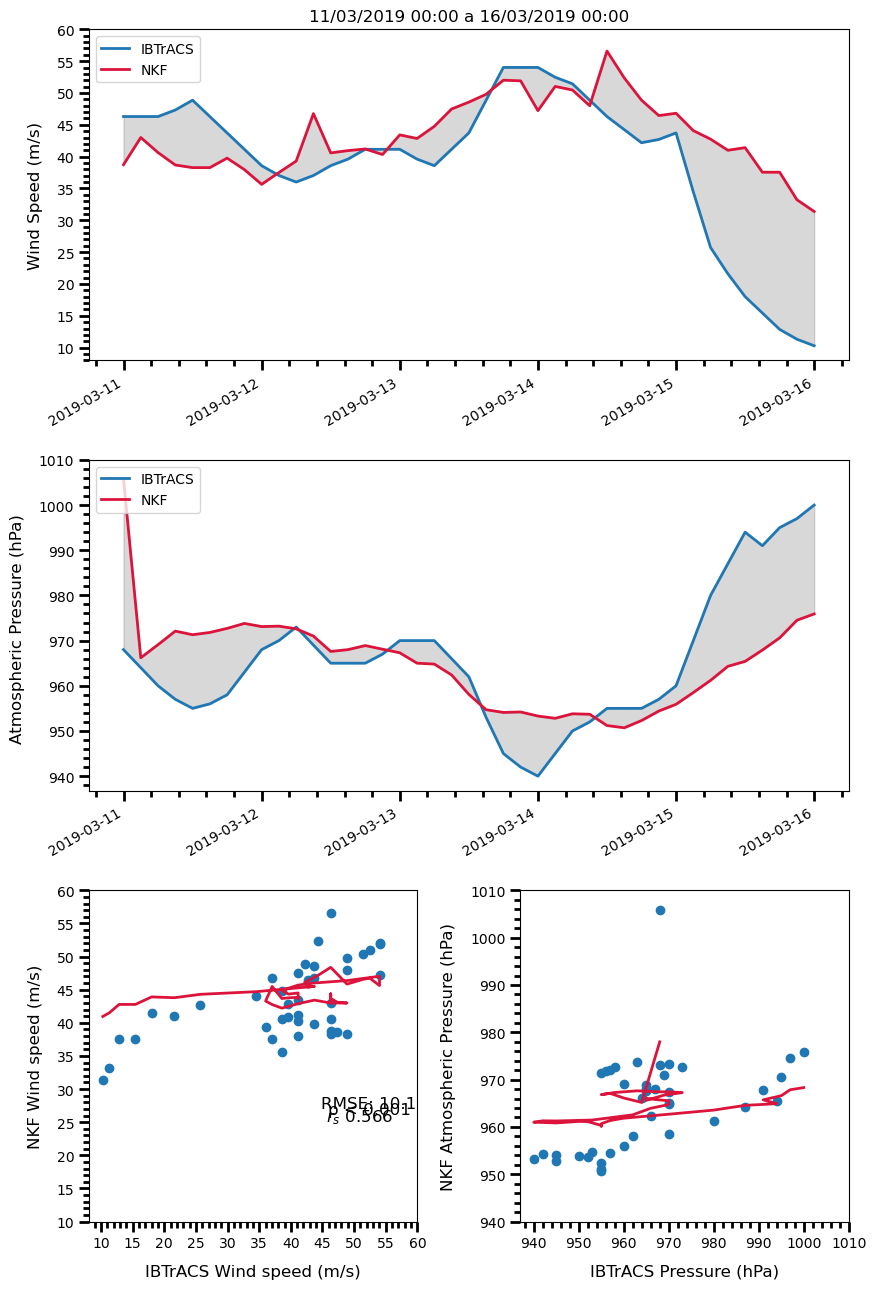

In [3]:
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Reu_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
print(wind_ib)
pres_ib = csv_import['Pressure_IB']
pres_ws = pres_ib.values

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_KF_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_KF','Pressure_KF'])
wind_kf = csv_import['Wind_KF']*0.51444 #Knots to m/s
wind_kf = wind_kf.values
print(wind_kf)
pres_kf = csv_import['Pressure_KF']
pres_kf = pres_kf.values

#2. Calculate RMSE, correlation and p-value.
# Calculate correlation, trend and RMSE
# Variable 1 (Air Temperature)
stats = scipy.stats.spearmanr(wind_ib,wind_kf, axis=0, nan_policy='propagate')
cor1  = str(stats[0])
pval1 = stats[1]
cor1  = cor1[0:5]
z1    = np.polyfit(wind_ib,wind_kf, 1)
p1    = np.poly1d(z1)
rmse1 = np.sqrt(np.mean((wind_ib-wind_kf)**2))
rmse1 = str(rmse1)
rmse1 = rmse1[0:4]
mae1=mean_absolute_error(wind_ib,wind_kf)
print('mae1=',mae1)

# Variable 2.
# Atmospheric Pressure.
stats = scipy.stats.spearmanr(pres_ib,pres_kf, axis=0, nan_policy='propagate')
cor2  = str(stats[0])
pval2 = stats[1]
cor2  = cor2[0:5]
z2    = np.polyfit(pres_ib,pres_kf, 1)
p2    = np.poly1d(z2)

rmse2 = np.sqrt(np.mean((pres_ib-pres_kf)**2))
rmse2 = str(rmse2)
rmse2 = rmse2[0:4]
mae2=mean_absolute_error(pres_ib,pres_kf)
print('mae2=',mae2)


#4. Create variable to store X-Axis data.
# Rearrange time.
#idx   = pd.date_range('2020-04-12 12:00', '2020-04-19 18:45', freq = '1H')
idx   = pd.date_range('2019-03-11 00:00', '2019-03-16 00:00', freq = '3H')
hours = mdates.HourLocator(interval = 3)
h_fmt = mdates.DateFormatter('%d/%M %Hh')

#3. Plot figure and set axis/data resources.
# Create figures subplots.
#axs = plt.subplots(4, 1, constrained_layout=True)
fig = plt.figure()

# Y-axis range for each plots.
y_major_ticks  = np.arange(10, 60.1, 5)
y_major_ticks2 = np.arange(940, 1010.1, 10)
y_major_ticks3 = np.arange(0, 1, 2)
y_major_ticks4 = np.arange(-4, 5, 0.5)

# Plot the figures.
# Plot 1.
ax1 = plt.subplot2grid((3,3), (0,0),rowspan=1,colspan=2)
ax1.plot(idx,wind_ib,linestyle='-',label='IBTrACS', marker='',linewidth=2,color='C0')  
ax1.plot(idx,wind_kf,linestyle='-',label='NKF',marker='',linewidth=2,color='crimson') 
plt.fill_between(idx, wind_ib, wind_kf,alpha=0.3,color='gray')
ax1.legend(loc='upper left',fontsize=10)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both',  width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.set_yticks(y_major_ticks)
ax1.set_ylabel('Wind Speed (m/s)',fontsize=12, labelpad=10) #Temperature \n [°C]
ax1.set_title('11/03/2019 00:00 a 16/03/2019 00:00')
for label in ax1.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

# Plot 2.
ax2 = plt.subplot2grid((3,3), (1,0), rowspan=1,colspan=2) 
ax2.plot(idx,pres_ib,label='IBTrACS',linestyle='-',marker='',linewidth=2,color='C0',alpha=1)    
ax2.plot(idx,pres_kf,label='NKF',linestyle='-',marker='',linewidth=2,color='crimson')
plt.fill_between(idx, pres_ib, pres_kf,alpha=0.3,color='gray')
ax2.legend(loc='upper left',fontsize=10)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='both',  width=2)
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax2.set_yticks(y_major_ticks2)
ax2.set_ylabel('Atmospheric Pressure (hPa) ',fontsize=12, labelpad=10) #\n [hPa]
for label in ax2.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

# Plot 3.
ax3 = plt.subplot2grid((3,3), (2,0)) 
ax3.scatter(wind_ib,wind_kf,color='C0')   
ax3.plot(wind_ib,p1(wind_kf),linestyle='-',color='crimson',linewidth=2)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which='both',  width=2)
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)
ax3.set_yticks(y_major_ticks)
ax3.set_xticks(y_major_ticks)
ax3.set_ylabel('NKF Wind speed (m/s)',fontsize=12, labelpad=10)
ax3.set_xlabel('IBTrACS Wind speed (m/s)',fontsize=12, labelpad=10)
ax3.text(45.6,25.2,'$r_{s}$ '+cor1,color='k',fontsize=12)
if pval1 < 0.001:
    ax3.text(45.8,26.2,'p < 0.001',color='k',fontsize=12)
else:
    ax3.text(45.8,26.2,'p > 0.001',color='k',fontsize=12)  
ax3.text(44.8,27.2,'RMSE: '+rmse1,color='k',fontsize=12)

# plot 4.
ax4 = plt.subplot2grid((3,3), (2,1),)     
ax4.scatter(pres_ib,pres_kf,color='C0')  
ax4.plot(pres_ib,p2(pres_kf),linestyle='-',color='crimson',linewidth=2)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which='both',  width=2)
ax4.tick_params(which='major', length=7)
ax4.tick_params(which='minor', length=4)
ax4.set_yticks(y_major_ticks2)
ax4.set_xticks(y_major_ticks2)
ax4.set_ylabel('NKF Atmospheric Pressure (hPa)',fontsize=12, labelpad=10)
ax4.set_xlabel('IBTrACS Pressure (hPa)',fontsize=12, labelpad=10)
ax4.text(959.2,947.2,'$r_{s}$ '+cor2,color='k',fontsize=12)
if pval2 < 0.001:
    ax4.text(959.5,948.2,'p < 0.001',color='k',fontsize=12)
else:
    ax4.text(959.5,948.2,'p > 0.001',color='k',fontsize=12)
ax4.text(958.5,949.2,'RMSE: '+rmse2,color='k',fontsize=12)


# Set final fig resources and then save figure.
fig.set_size_inches(13, 13)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.3)
fig.savefig('feb_kf_linear_reg_time_series.png',transparent=False, bbox_inches = 'tight', pad_inches=0, dpi=250)
